## Business Case 

FicZon Inc is an IT solution provider with products ranging from on premises products to SAAS based solutions. FicZon major leads generation channel is digital and through their website. 
FicZon business is majorly dependent on the sales force 
effectiveness. As the market is maturing and more new competitors 
entering the market, FicZon is experiencing the dip in sales.

Effective sales is dependent on lead quality and as of now, this is 
based on manual categorization and highly depended on sales staff. 
Though there is a quality process, which continuously updates the 
lead categorization, it’s value is in for post analysis, rather than 
conversation.

FicZon wants to explore Machine Learning to pre-categorize the lead 
quality and as result, expecting significant increase in sales 
effectiveness.

## Project Goal : 
1. Data exploration insights – Sales effectiveness.
2. ML model to predict the Lead Category (High Potential , Low 
   Potential)


## Task : Classification

## Importing Libraries:

In [1]:
!pip install pymysql
!pip install mysql-connector-python

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import mysql.connector
from mysql.connector import (connection)
import warnings 
warnings.filterwarnings("ignore")

## Data Collection

In [3]:
# Connecting to database server
connector = mysql.connector.connect(host = ' 18.136.157.135',
                                    user = 'dm_team2',
                                    password = 'DM!$Team&27@9!20!',
                                    database = 'project_sales')

In [4]:
# Fetching data from data base
database_tables = pd.read_sql_query('show tables', connector)
print(database_tables)

  Tables_in_project_sales
0                    data


In [5]:
query = 'select * from data'

In [6]:
data = pd.read_sql(query, connector)

In [7]:
data = data.replace('', pd.NA)

In [8]:
pd.set_option('display.max_columns', None)

## Basic Checks

In [9]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,<NA>,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,<NA>,Mode-5,Open
1,14-11-2018 09:22,<NA>,Website,XXXXXXX,#VALUE!,Sales-Agent-10,<NA>,Mode-5,Open
2,14-11-2018 09:21,<NA>,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,<NA>,Mode-5,Open
3,14-11-2018 08:46,<NA>,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,<NA>,Mode-5,Open
4,14-11-2018 07:34,<NA>,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,<NA>,Mode-5,Open


In [10]:
data.tail()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
7417,28-04-2018 09:45,9,Call,<NA>,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,<NA>,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,<NA>,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,<NA>,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry
7421,28-04-2018 07:54,25,Website,<NA>,cXXXXXXX@gmail.com,Sales-Agent-3,Chennai,Mode-1,CONVERTED


In [11]:
data.columns

Index(['Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent',
       'Location', 'Delivery_Mode', 'Status'],
      dtype='object')

In [12]:
data.shape

(7422, 9)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Created        7422 non-null   object
 1   Product_ID     7364 non-null   object
 2   Source         7405 non-null   object
 3   Mobile         5612 non-null   object
 4   EMAIL          7422 non-null   object
 5   Sales_Agent    7399 non-null   object
 6   Location       7364 non-null   object
 7   Delivery_Mode  7422 non-null   object
 8   Status         7422 non-null   object
dtypes: object(9)
memory usage: 522.0+ KB


- All features of datatype are object

In [14]:
data.describe(include = 'O')

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
count,7422,7364,7405,5612,7422,7399,7364,7422,7422
unique,6752,29,25,486,883,12,17,5,11
top,26-09-2018 11:30,18,Call,XXXXXXX,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
freq,4,1711,2547,222,1701,1500,2500,2975,1536


- There is no constant feature in the dataset.

## Domain Analysis:

* SALES EFFECTIVENESS:

Sales effectiveness refers to the ability of a company's sales professionals to “win” at each stage of the customer's buying process, and ultimately earn the business on the right terms and in the right timeframe. Improving sales effectiveness is not just a sales function issue; it's a company issue, as it requires deep collaboration between sales and marketing to understand what is working and not working, and continuous improvement of the knowledge, messages, skills, and strategies that sales people apply as they work sales opportunities.

Sales effectiveness has historically been used to describe a category of technologies and consulting services aimed at helping companies improve their sales results. 

* SALES FORCE EFFECTIVENESS:

The purpose of sales force effectiveness is to increase company revenues through increased customer acquisition, product/service sales, and up-selling/cross-selling additional products and services. The purpose of sales force effectiveness metrics is "to measure the performance of a sales force and of individual salespeople." 

"When analyzing the performance of a salesperson, a number of metrics can be compared. These can reveal more about the salesperson than can be gauged by his or her total sales. When analyzing the performance of a sales team, an increase in revenue-per-rep can indicate improvement in salesforce effectiveness."

* DISCOVERING BEST PRACTICES:

After defining sales effectiveness, identifying the metrics that matter, and assessing their effectiveness, company leaders will likely find that sellers regularly follow inefficient processes without even knowing it. By doing so, sellers end up wasting time and energy on systems and strategies that don’t have high return values, which prevents them from closing deals and winning more sales.

Once organizations gain clear measurements of their sales processes, they can ask a few key questions to find out which tasks are most and least effective:

What doesn’t work?
What works really well?
How can what works get even better?
By asking and answering these questions, sales leaders can weed out the bad processes and get sellers to focus only on the ones that work best, increasing sales force effectiveness and improving win rates.

* HERE COMES MACHINE LEARNING

From a machine learning perspective, where you can train ML models on customer attributes, lead origin, and other details available.

How do you get the target variable? The status of the lead will help you create the target variable.

* TARGET VARIABLE = STATUS

In target veriable 11 labels are present (Junk Lead,Not Responding,CONVERTED,Just Enquiry,Potential,Long Term,In Progress Positive,In Progress Negative,LOST,Open,converted )

This all labels is tell about the customer lead category [high potential, low potential]

1.Created:
This is unique feature in data tell about activity related to the selling and no of goods sold in certain date as well as time.

2.Product ID:
Id of particular product.

3.Source:
The source contains imformation about the customer systematic search like call, live chats, and campaign.

4.Mobile:
This is a unique feature contains a Mobile no of customer.

5.Email:
This also unique feature contains a Email-id of customer.

6.Sales Agent:

Sales agent is a front line customer service, A person or a company that acts as a sales agent on behalf of the exporting company ( principal ), introducing its products to potential buyers in the external market, in exchange for a commission based on the value of the business deals arranged and paid to the principal.

7.Location:
The Location of sale field always has the main business address in it and has to be changed manually. 
This feature contain lots of different location.
8.Delivery mode:
There are 5 types of Delivery modes are in the dataset.

9. Status:
This is a target variable tell about the lead category of customer.[high potential, low potential]

 #### DATA SUMMARY :

- The data is supervised and categorical including target veriable.
- In this data two features Mobile and Email Id are unique so we will drop those columns.
- All feature is contain lots of different label so will compress and merge the labels such that only the main ones were included.
- In this data some feature contain blank spaces so we need to replace with NAN values.
- No need to handle outliers.
- Used encoding technique to handle categorical feature.

# Exploratory Data Analysis

## Univariate Analysis

### 1. Product ID

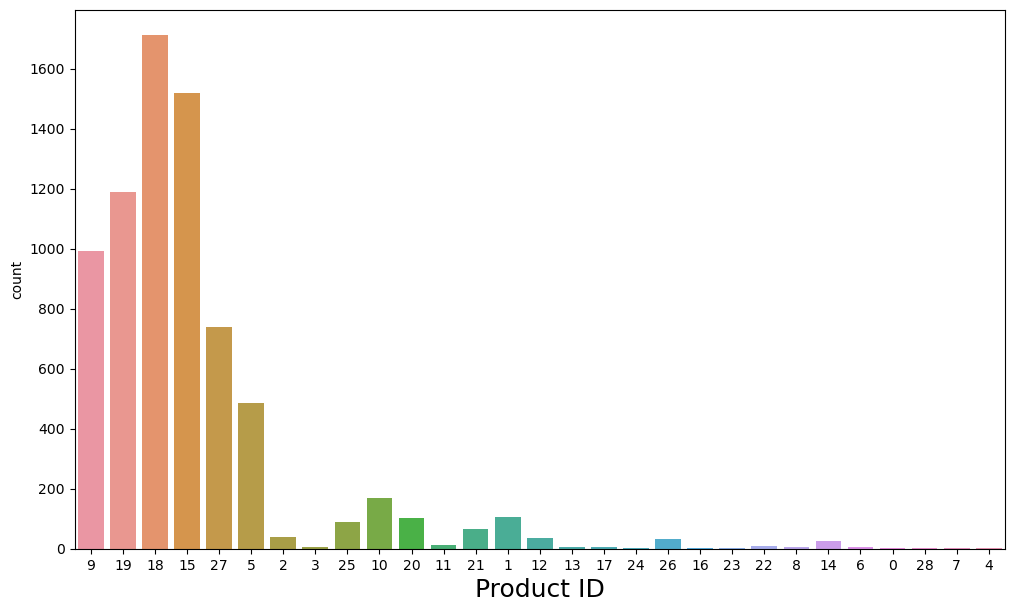

In [15]:
plt.figure(figsize=(12,7))
sns.countplot(data.Product_ID)
plt.xlabel('Product ID', fontsize = 18)
plt.show()

- Observation:
Above Plot shows that 9,19,18,15,27,5 these are maximumm sold out products compare to 
other products.

 ### 2. Source 

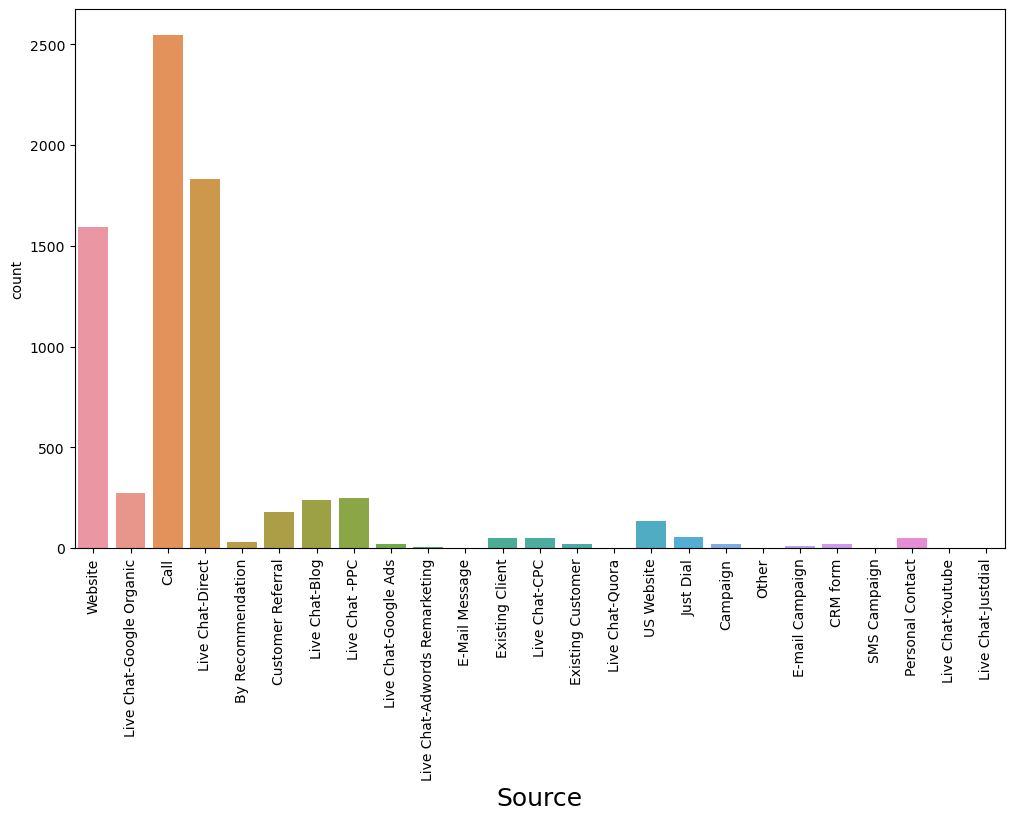

In [16]:
plt.figure(figsize=(12,7))
sns.countplot(data.Source)
plt.xticks(rotation = 90)
plt.xlabel('Source', fontsize = 18)
plt.show()

- Observation:
Majority of sales done from source of call, website and live-chat direct compare to other types of sources.

### 3. Sales Agent

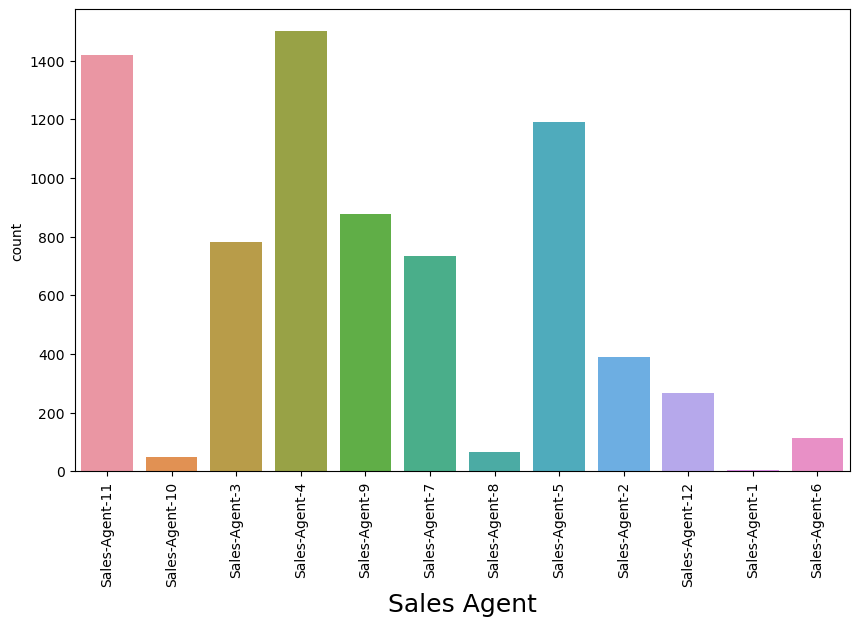

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(data.Sales_Agent)
plt.xticks(rotation = 90)
plt.xlabel('Sales Agent', fontsize = 18)
plt.show()

### 4. Location

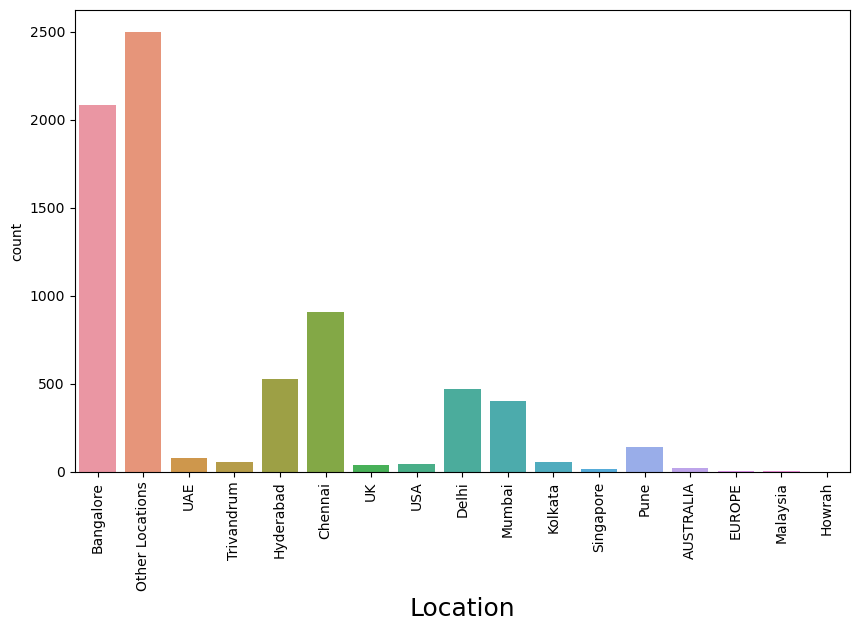

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(data.Location)
plt.xticks(rotation = 90)
plt.xlabel('Location', fontsize = 18)
plt.show()

Observation :
1. There are total 17 different locations where company sales its products.
2. Other Loactions and Bangalore region has done more sales.
3. Chennai has done quite high sales compare to Hydrabad, Delhi and Mumbai.
4. Rest of locations has performed poor.

### 5. Delivery Mode

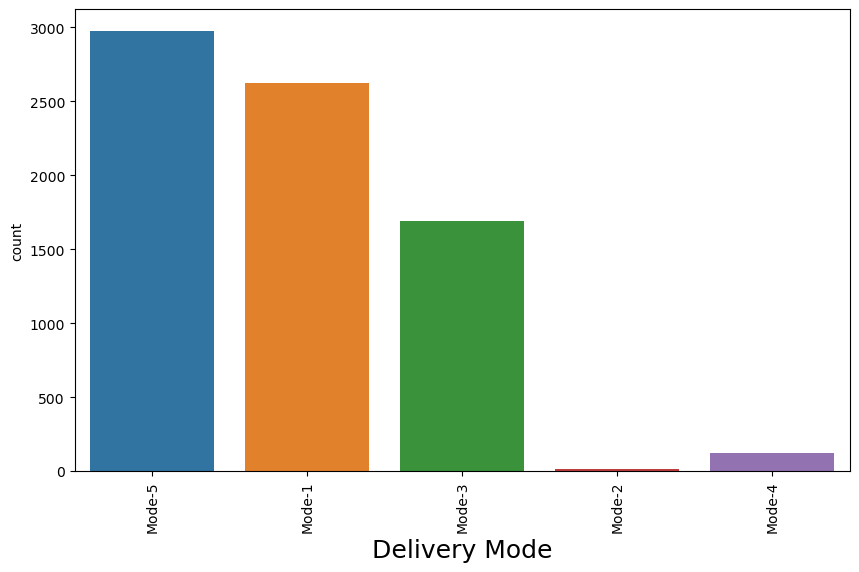

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(data.Delivery_Mode)
plt.xticks(rotation = 90)
plt.xlabel('Delivery Mode', fontsize = 18)
plt.show()

Observation:
1. There are 5 types of delivery mode of company products.
2. Mode 5 has highest count followed by Mode 1 and Mode 3.
3. Mode 4 and Mode 2 used very less times.


### 6. Status

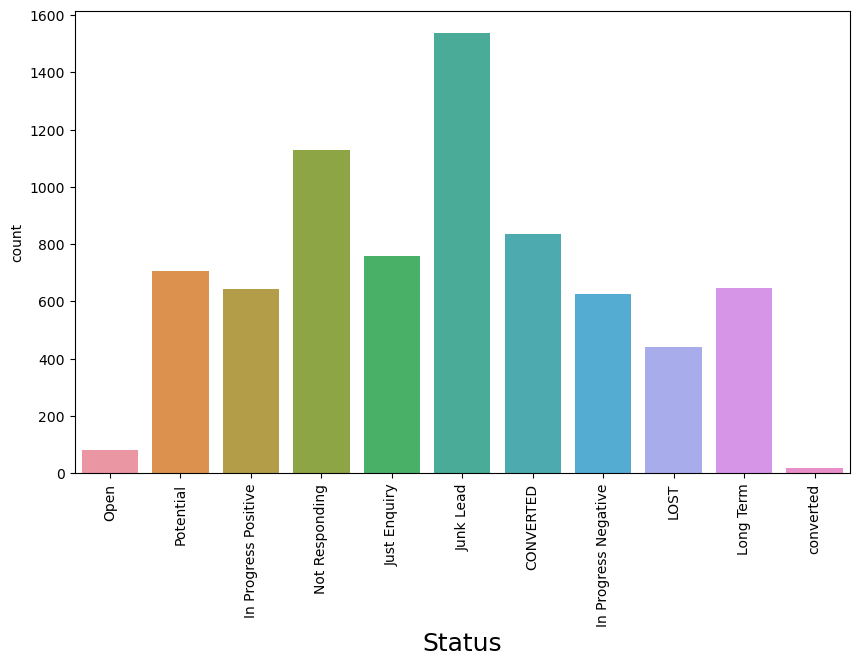

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(data.Status)
plt.xticks(rotation = 90)
plt.xlabel('Status', fontsize = 18)
plt.show()

Observation:
- Above plot shows that there are 11 types of categories of status out of which Junk lead has highest count which means these are low potential customer compare to others. 

### 1. Getting the Source call with the Delivery - 5

In [21]:
data.loc[(data.Source == "Call") & (data.Delivery_Mode == "Mode-5")]

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
19,13-11-2018 18:48,19,Call,701XXXXXXX,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Potential
28,13-11-2018 16:09,27,Call,994XXXXXXX,mXXXXXXXs@mail.com,Sales-Agent-11,Chennai,Mode-5,In Progress Positive
40,13-11-2018 12:26,9,Call,992XXXXXXX,gXXXXXXXologies.in,Sales-Agent-4,Chennai,Mode-5,Potential
43,13-11-2018 11:29,2,Call,894XXXXXXX,#VALUE!,Sales-Agent-9,Other Locations,Mode-5,In Progress Positive
44,13-11-2018 11:29,9,Call,888XXXXXXX,sXXXXXXXe@live.com,Sales-Agent-11,Bangalore,Mode-5,In Progress Positive
...,...,...,...,...,...,...,...,...,...
7374,30-04-2018 10:38,15,Call,<NA>,#VALUE!,Sales-Agent-11,Other Locations,Mode-5,Junk Lead
7396,28-04-2018 16:12,15,Call,<NA>,#VALUE!,Sales-Agent-7,Other Locations,Mode-5,Junk Lead
7398,28-04-2018 16:11,15,Call,<NA>,#VALUE!,Sales-Agent-2,Delhi,Mode-5,Junk Lead
7399,28-04-2018 16:08,15,Call,<NA>,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,In Progress Negative


In [22]:
# Percentqage of source call with delivery mode-5
len(data.loc[(data.Source == "Call") & (data.Delivery_Mode == "Mode-5")])/7422*100

20.89733225545675

- Here almost 21% of customer has preferred call with delivery mode-5.

### 2.1 Sales agent 11 with status of potential 

In [23]:
data.loc[(data.Sales_Agent == 'Sales-Agent-11') & (data.Status == 'Potential')]

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
24,13-11-2018 17:09,18,Website,790XXXXXXX,gXXXXXXX@gmail.com,Sales-Agent-11,Trivandrum,Mode-1,Potential
32,13-11-2018 15:15,27,Live Chat-Direct,858XXXXXXX,#VALUE!,Sales-Agent-11,Hyderabad,Mode-3,Potential
35,13-11-2018 13:52,9,Website,900XXXXXXX,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Potential
51,13-11-2018 11:09,15,Call,994XXXXXXX,#VALUE!,Sales-Agent-11,Other Locations,Mode-5,Potential
70,12-11-2018 17:23,18,Website,902XXXXXXX,mXXXXXXX@gmail.com,Sales-Agent-11,Chennai,Mode-1,Potential
...,...,...,...,...,...,...,...,...,...
5878,05-06-2018 16:32,18,Website,<NA>,mXXXXXXX@gmail.com,Sales-Agent-11,Hyderabad,Mode-1,Potential
5881,05-06-2018 15:19,10,Website,<NA>,sXXXXXXX@cisco.com,Sales-Agent-11,Delhi,Mode-1,Potential
6812,13-05-2018 16:20,27,Live Chat-Adwords Remarketing,<NA>,gXXXXXXX@gmail.com,Sales-Agent-11,Chennai,Mode-3,Potential
6886,10-05-2018 21:30,5,<NA>,<NA>,aXXXXXXX.j@pwc.com,Sales-Agent-11,Other Locations,Mode-1,Potential


In [24]:
len(data.loc[(data.Sales_Agent == 'Sales-Agent-11') & (data.Status == 'Potential')])/7422*100

3.354890864995958

- Sales Agent 11 has only 3% potential customer.

### 2.2 Sales Agent 4 with status Potential

In [25]:
data.loc[(data.Sales_Agent == 'Sales-Agent-4') & (data.Status == 'Potential')]

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
19,13-11-2018 18:48,19,Call,701XXXXXXX,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Potential
29,13-11-2018 15:50,19,Live Chat-Direct,+49XXXXXXX,vXXXXXXX@gmail.com,Sales-Agent-4,UK,Mode-2,Potential
34,13-11-2018 13:53,9,Call,974XXXXXXX,#VALUE!,Sales-Agent-4,Bangalore,Mode-1,Potential
40,13-11-2018 12:26,9,Call,992XXXXXXX,gXXXXXXXologies.in,Sales-Agent-4,Chennai,Mode-5,Potential
58,13-11-2018 10:18,27,Website,967XXXXXXX,sXXXXXXX@gmail.com,Sales-Agent-4,Hyderabad,Mode-1,Potential
...,...,...,...,...,...,...,...,...,...
7127,04-05-2018 20:10,21,CRM form,<NA>,pXXXXXXX@gmail.com,Sales-Agent-4,Bangalore,Mode-1,Potential
7163,04-05-2018 09:18,19,Website,<NA>,sXXXXXXX@gmail.com,Sales-Agent-4,Bangalore,Mode-1,Potential
7237,02-05-2018 15:20,19,CRM form,<NA>,cXXXXXXXffmail.com,Sales-Agent-4,Bangalore,Mode-1,Potential
7257,02-05-2018 12:25,21,Call,<NA>,nXXXXXXX@gmail.com,Sales-Agent-4,Bangalore,Mode-1,Potential


In [26]:
len(data.loc[(data.Sales_Agent == 'Sales-Agent-4') & (data.Status == 'Potential')])/7422*100

1.953651306925357

### 3. Junk Lead status customer

In [27]:
data.loc[data['Status'] == 'Junk Lead']

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
36,13-11-2018 13:34,19,Website,982XXXXXXX,vXXXXXXX@gmail.com,Sales-Agent-7,Other Locations,Mode-1,Junk Lead
74,12-11-2018 15:17,15,Call,883XXXXXXX,#VALUE!,Sales-Agent-9,Other Locations,Mode-5,Junk Lead
76,12-11-2018 15:15,15,Call,886XXXXXXX,#VALUE!,Sales-Agent-11,Other Locations,Mode-5,Junk Lead
88,12-11-2018 13:16,15,Call,790XXXXXXX,#VALUE!,Sales-Agent-7,Other Locations,Mode-5,Junk Lead
89,12-11-2018 13:16,15,Call,974XXXXXXX,#VALUE!,Sales-Agent-11,Other Locations,Mode-5,Junk Lead
...,...,...,...,...,...,...,...,...,...
7396,28-04-2018 16:12,15,Call,<NA>,#VALUE!,Sales-Agent-7,Other Locations,Mode-5,Junk Lead
7398,28-04-2018 16:11,15,Call,<NA>,#VALUE!,Sales-Agent-2,Delhi,Mode-5,Junk Lead
7401,28-04-2018 15:35,18,Live Chat-Blog,<NA>,gXXXXXXX@gmail.com,Sales-Agent-3,Chennai,Mode-1,Junk Lead
7405,28-04-2018 13:35,18,Live Chat-Direct,<NA>,sXXXXXXX@gmail.com,Sales-Agent-3,Bangalore,Mode-1,Junk Lead


In [28]:
# Percentage
len(data.loc[data['Status'] == 'Junk Lead'])/7422*100

20.695230396119644

- Almost 21% of customer status is junk lead.

### 4.1 Other Locations 

In [29]:
data.loc[data['Location'] == 'Other Locations']

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
19,13-11-2018 18:48,19,Call,701XXXXXXX,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Potential
27,13-11-2018 16:35,18,Live Chat-Direct,XXXXXXX,nXXXXXXXabirla.com,Sales-Agent-9,Other Locations,Mode-3,Not Responding
36,13-11-2018 13:34,19,Website,982XXXXXXX,vXXXXXXX@gmail.com,Sales-Agent-7,Other Locations,Mode-1,Junk Lead
43,13-11-2018 11:29,2,Call,894XXXXXXX,#VALUE!,Sales-Agent-9,Other Locations,Mode-5,In Progress Positive
45,13-11-2018 11:28,15,Call,986XXXXXXX,#VALUE!,Sales-Agent-11,Other Locations,Mode-5,Not Responding
...,...,...,...,...,...,...,...,...,...
7399,28-04-2018 16:08,15,Call,<NA>,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,In Progress Negative
7402,28-04-2018 14:46,9,Live Chat-Direct,<NA>,rXXXXXXX@gmail.com,Sales-Agent-11,Other Locations,Mode-1,CONVERTED
7416,28-04-2018 10:00,19,Live Chat-Direct,<NA>,uXXXXXXX@gmail.com,Sales-Agent-9,Other Locations,Mode-3,Junk Lead
7418,28-04-2018 09:43,15,Call,<NA>,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST


In [30]:
# Getting percentage
len(data.loc[data['Location'] == 'Other Locations'])/7422*100

33.68364322285098

- Around 34% customer are from other locations.

### 4.2 Bangalore Location

In [31]:
data.loc[data['Location'] == 'Bangalore']

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
18,13-11-2018 18:51,9,Live Chat-Google Organic,971XXXXXXX,mXXXXXXX@gmail.com,Sales-Agent-3,Bangalore,Mode-1,Potential
26,13-11-2018 16:37,18,Call,740XXXXXXX,nXXXXXXX@gmail.com,Sales-Agent-7,Bangalore,Mode-1,In Progress Positive
31,13-11-2018 15:16,18,Call,953XXXXXXX,#VALUE!,Sales-Agent-7,Bangalore,Mode-1,Not Responding
33,13-11-2018 14:11,9,By Recommendation,974XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-7,Bangalore,Mode-4,Potential
34,13-11-2018 13:53,9,Call,974XXXXXXX,#VALUE!,Sales-Agent-4,Bangalore,Mode-1,Potential
...,...,...,...,...,...,...,...,...,...
7409,28-04-2018 12:19,19,Call,<NA>,aXXXXXXX@gmail.com,Sales-Agent-2,Bangalore,Mode-4,Long Term
7410,28-04-2018 11:58,18,Call,<NA>,aXXXXXXX@gmail.com,Sales-Agent-4,Bangalore,Mode-1,CONVERTED
7412,28-04-2018 11:25,18,Just Dial,<NA>,cXXXXXXX@gmail.com,Sales-Agent-3,Bangalore,Mode-1,Long Term
7415,28-04-2018 10:50,21,Live Chat-Direct,<NA>,aXXXXXXX@gmail.com,Sales-Agent-4,Bangalore,Mode-1,In Progress Negative


In [32]:
# Getting percentage
len(data.loc[data['Location'] == 'Bangalore'])/7422*100

28.078684990568583

- 28% of customers from Bangalore location.

### 5.1 Maximum Selling Product '18'

In [33]:
# Get percentage
len(data.loc[data['Product_ID'] == '18'])/7422*100

23.053085421719214

- Out of all selling products this 18 no product sales is 23%.

### 5.2 Maximum Selling Product '15'

In [34]:
# Get percentage
len(data.loc[data['Product_ID'] == '15'])/7422*100

20.45270816491512

- This product no 15 also has 20% sales. 

## Data Preprocessing/Feature Engineering

In [35]:
# Checking for duplicates
data.duplicated().sum()

2

In [36]:
# Removing duplicate values
data = data.drop_duplicates()
print(data.shape)

(7420, 9)


In [37]:
data.isnull().sum()

Created             0
Product_ID         56
Source             17
Mobile           1810
EMAIL               0
Sales_Agent        23
Location           56
Delivery_Mode       0
Status              0
dtype: int64

Observation: 
- Total 5 features has missing values out of which excluding Mobile feature we will impute mode for replacing missing values.

In [38]:
# 1.Product ID  
data.Product_ID.mode()

0    18
Name: Product_ID, dtype: object

In [39]:
data.loc[data['Product_ID'].isnull()==True,'Product_ID']= 18

In [40]:
# 2.Source
data.Source.mode()

0    Call
Name: Source, dtype: object

In [41]:
data.loc[data['Source'].isnull()==True,'Source']= 'Call'

In [42]:
# 3.Sales agent 
data.Sales_Agent.mode()

0    Sales-Agent-4
Name: Sales_Agent, dtype: object

In [43]:
data.loc[data['Sales_Agent'].isnull()==True,'Sales_Agent']= 'Sales-Agent-4'

In [44]:
# 4.Location 
data.Location.mode()

0    Other Locations
Name: Location, dtype: object

In [45]:
data.loc[data['Location'].isnull()==True,'Location']= 'Other Locations'

In [46]:
# Checking missing value after imputation
data.isnull().sum()

Created             0
Product_ID          0
Source              0
Mobile           1810
EMAIL               0
Sales_Agent         0
Location            0
Delivery_Mode       0
Status              0
dtype: int64

## Let's Check with Created Feature

In [47]:
# Force Typecasting
data['Created'] = pd.to_datetime(data['Created'])

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7420 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Created        7420 non-null   datetime64[ns]
 1   Product_ID     7420 non-null   object        
 2   Source         7420 non-null   object        
 3   Mobile         5610 non-null   object        
 4   EMAIL          7420 non-null   object        
 5   Sales_Agent    7420 non-null   object        
 6   Location       7420 non-null   object        
 7   Delivery_Mode  7420 non-null   object        
 8   Status         7420 non-null   object        
dtypes: datetime64[ns](1), object(8)
memory usage: 579.7+ KB


In [49]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,2018-11-14 10:05:00,18,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,Other Locations,Mode-5,Open
1,2018-11-14 09:22:00,18,Website,XXXXXXX,#VALUE!,Sales-Agent-10,Other Locations,Mode-5,Open
2,2018-11-14 09:21:00,18,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,Other Locations,Mode-5,Open
3,2018-11-14 08:46:00,18,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,Other Locations,Mode-5,Open
4,2018-11-14 07:34:00,18,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,Other Locations,Mode-5,Open


In [50]:
# Creating new column from created feature
data['Day_Of_Week'] = data['Created'].dt.day_name()

In [51]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status,Day_Of_Week
0,2018-11-14 10:05:00,18,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,Other Locations,Mode-5,Open,Wednesday
1,2018-11-14 09:22:00,18,Website,XXXXXXX,#VALUE!,Sales-Agent-10,Other Locations,Mode-5,Open,Wednesday
2,2018-11-14 09:21:00,18,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,Other Locations,Mode-5,Open,Wednesday
3,2018-11-14 08:46:00,18,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,Other Locations,Mode-5,Open,Wednesday
4,2018-11-14 07:34:00,18,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,Other Locations,Mode-5,Open,Wednesday


In [52]:
# Checking with start date of data
data['Created'].min()

Timestamp('2018-01-05 01:15:00')

In [53]:
# Checking with end date of data 
data['Created'].max()

Timestamp('2018-12-11 22:33:00')

In [54]:
# Days within start and end dates
data['Created'].max() - data['Created'].min()

Timedelta('340 days 21:18:00')

In [55]:
# Creating year, month and days from this datetime feature
data['year'] = data['Created'].dt.year
data['month'] = data['Created'].dt.month
data['day'] = data['Created'].dt.day
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status,Day_Of_Week,year,month,day
0,2018-11-14 10:05:00,18,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,Other Locations,Mode-5,Open,Wednesday,2018,11,14
1,2018-11-14 09:22:00,18,Website,XXXXXXX,#VALUE!,Sales-Agent-10,Other Locations,Mode-5,Open,Wednesday,2018,11,14
2,2018-11-14 09:21:00,18,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,Other Locations,Mode-5,Open,Wednesday,2018,11,14
3,2018-11-14 08:46:00,18,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,Other Locations,Mode-5,Open,Wednesday,2018,11,14
4,2018-11-14 07:34:00,18,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,Other Locations,Mode-5,Open,Wednesday,2018,11,14


In [56]:
# Creating another column whether date is weekend
data['date_is_weekend'] = np.where(data['Day_Of_Week'].isin(['Saturday','Sunday']),1, 0)
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status,Day_Of_Week,year,month,day,date_is_weekend
0,2018-11-14 10:05:00,18,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,Other Locations,Mode-5,Open,Wednesday,2018,11,14,0
1,2018-11-14 09:22:00,18,Website,XXXXXXX,#VALUE!,Sales-Agent-10,Other Locations,Mode-5,Open,Wednesday,2018,11,14,0
2,2018-11-14 09:21:00,18,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,Other Locations,Mode-5,Open,Wednesday,2018,11,14,0
3,2018-11-14 08:46:00,18,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,Other Locations,Mode-5,Open,Wednesday,2018,11,14,0
4,2018-11-14 07:34:00,18,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,Other Locations,Mode-5,Open,Wednesday,2018,11,14,0


In [57]:
data.groupby('Day_Of_Week').size()

Day_Of_Week
Friday       1076
Monday       1474
Saturday      797
Sunday        598
Thursday     1084
Tuesday      1191
Wednesday    1200
dtype: int64

In [58]:
# This has become a constant feature as only one year in all data 
data.groupby('year').size()

year
2018    7420
dtype: int64

In [59]:
# Let's check month size
data.groupby('month').size()

month
1      226
2      295
3      255
4      370
5     1041
6     1045
7      960
8      914
9      922
10     829
11     350
12     213
dtype: int64

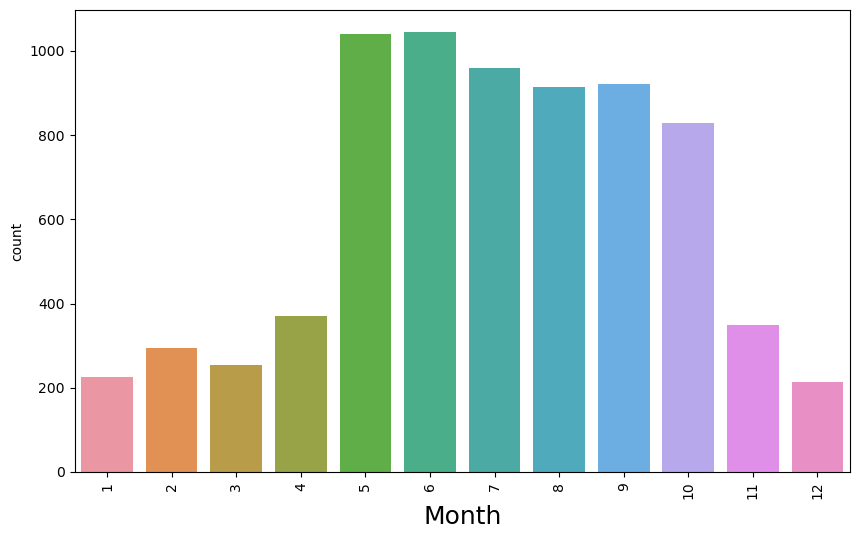

In [60]:
# Let's visualise month wise data 
plt.figure(figsize=(10,6))
sns.countplot(data.month)
plt.xticks(rotation = 90)
plt.xlabel('Month', fontsize = 18)
plt.show()

Observation: 
- Above plot shows that from 5th month to 10th month there is high count of sales compare to rest of the months.

    

In [61]:
data.groupby('date_is_weekend').size()

date_is_weekend
0    6025
1    1395
dtype: int64

In [62]:
data.groupby('day').size()

day
5     478
6     499
7     450
8     437
9     453
10    402
11    320
13    275
14    242
15    191
16    221
17    222
18    253
19    192
20    205
21    214
22    248
23    265
24    203
25    259
26    215
27    209
28    221
29    267
30    296
31    183
dtype: int64

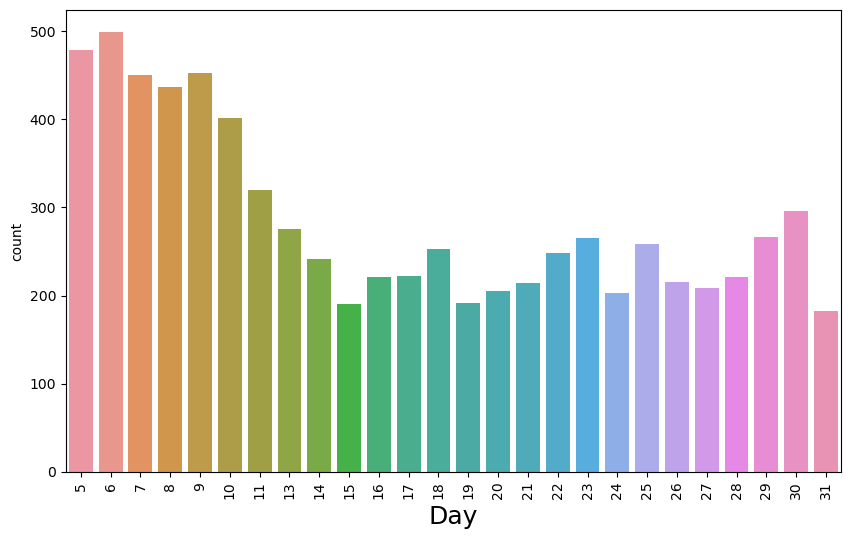

In [63]:
# Let's visualise days of every month
plt.figure(figsize=(10,6))
sns.countplot(data.day)
plt.xticks(rotation = 90)
plt.xlabel('Day', fontsize = 18)
plt.show()

Observation:
- Working days starts with 5th of every month and from 5th day to 9th day of every month sales count is actually high.

## Compressing and merging labels

### 1. Product ID

In [64]:
# These 13 product id features has been sold to minimum so we can replace into minimum sold product
data.Product_ID.replace(['11','22','3','17','6','8','13','24','16','23','0','28','7','4'],'minimum sold',inplace=True)

### 2. Source

In [65]:
# Checking the value counts
data.Source.value_counts()

Call                             2564
Live Chat-Direct                 1834
Website                          1592
Live Chat-Google Organic          274
Live Chat -PPC                    249
Live Chat-Blog                    237
Customer Referral                 180
US Website                        137
Just Dial                          56
Existing Client                    51
Personal Contact                   50
Live Chat-CPC                      50
By Recommendation                  32
CRM form                           23
Existing Customer                  22
Live Chat-Google Ads               21
Campaign                           19
E-mail Campaign                    12
Live Chat-Adwords Remarketing       7
Live Chat-Quora                     2
Other                               2
SMS Campaign                        2
Live Chat-Youtube                   2
E-Mail Message                      1
Live Chat-Justdial                  1
Name: Source, dtype: int64

In [66]:
# This feature contains total 25 labels in that synthetic search/inquery of customer in different category
# so by making groups and putting them in one group of similar labels as [(Live ChatDirect,Live ChatGoogle Organic,Live Chat PPC)--> live chats]

# 1st group - Live chat
data.Source.replace(['Live Chat-Direct','Live Chat-Google Organic','Live Chat -PPC','Live Chat-Blog','Live Chat-CPC',
                    'Live Chat-Google Ads','Live Chat-Adwords Remarketing','Live Chat-Quora','Live Chat-Youtube',
                    'Live Chat-Justdial'],'live chat',inplace=True)

# 2nd group - new client
data.Source.replace(['Existing Client','Personal Contact','CRM form','Existing Customer'],'new client',inplace=True)

# 3rd group - website
data.Source.replace(['US Website','Just Dial'],'social',inplace=True)

# 4th group - recommendation
data.Source.replace(['Customer Referral','By Recommendation'],'recommendation',inplace=True)

# 5th group - campaign
data.Source.replace(['Campaign','E-mail Campaign','SMS Campaign','E-Mail Message'],'campaign',inplace=True)


In [67]:
# After grouping checking the value counts
data.Source.value_counts()

live chat         2677
Call              2564
Website           1592
recommendation     212
social             193
new client         146
campaign            34
Other                2
Name: Source, dtype: int64

### 3. Location

In [68]:
# Checking the value counts
data.Location.value_counts()

Other Locations    2556
Bangalore          2084
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              402
Pune                142
UAE                  79
Trivandrum           58
Kolkata              55
USA                  45
UK                   41
AUSTRALIA            25
Singapore            17
Malaysia              4
EUROPE                3
Howrah                1
Name: Location, dtype: int64

In [69]:
# This feature all country city location include so we are merge into different group

# 1st group
data.Location.replace(['Trivandrum','Kolkata','Howrah'],'Other Locations',inplace=True)

# 2nd group 
data.Location.replace(['UAE','Malaysia','Singapore'],'asia',inplace=True)

# 3rd group 
data.Location.replace(['USA','UK','AUSTRALIA','EUROPE'],'west country',inplace=True)

In [70]:
# After grouping checking value counts
data.Location.value_counts()

Other Locations    2670
Bangalore          2084
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              402
Pune                142
west country        114
asia                100
Name: Location, dtype: int64

### 4. Status

In [71]:
# Checking for value counts
data.Status.value_counts()

Junk Lead               1536
Not Responding          1129
CONVERTED                834
Just Enquiry             760
Potential                708
Long Term                646
In Progress Positive     643
In Progress Negative     626
LOST                     440
Open                      80
converted                 18
Name: Status, dtype: int64

In [72]:
# This is a target variable, after seprating the label & we are making two groups like high potential and low potential

# 1st group - low potential
data.Status.replace(['Junk Lead','Not Responding','In Progress Negative','Just Enquiry','LOST'],'low potential',inplace=True)

# 2nd group - high potential
data.Status.replace(['CONVERTED','Potential','Long Term','In Progress Positive','Open','converted'],'high potential',inplace=True)

In [73]:
# After grouping checking value counts
data.Status.value_counts()

low potential     4491
high potential    2929
Name: Status, dtype: int64

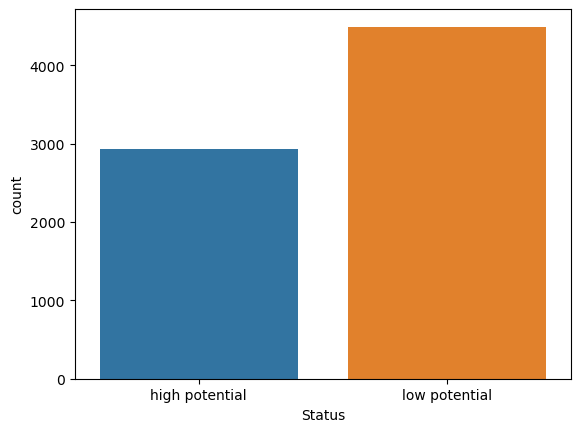

In [74]:
# Let's visualise target variable
sns.countplot(data['Status'])
plt.show()

Observation:
- The above plot shows that the dataset is imbalanced.

## Let's check monthwise relation with target variable

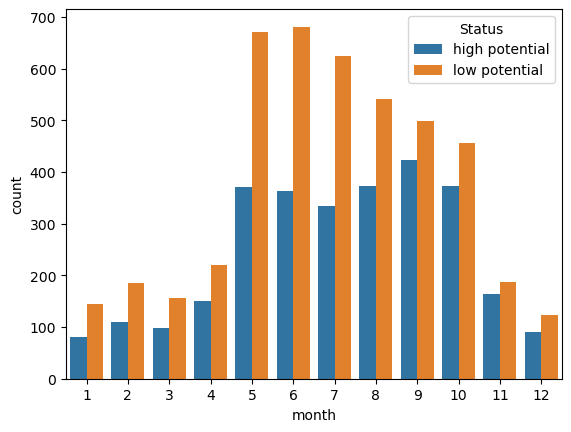

In [75]:
sns.countplot(x = 'month', hue = 'Status', data = data)
plt.show()

Observation:
- There is a significant increase in both type of potentials in a range of 5th to 10th month. Where low potential is high.
- But overall if we compare the high potential count is also high with rest of the months which we can take it in a positive way according to sales of a company.

## Let's check relation with date is weekend and target variable

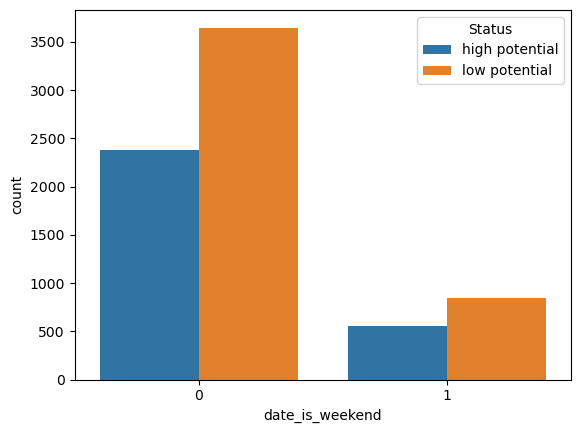

In [76]:
sns.countplot(x = 'date_is_weekend', hue = 'Status', data = data)
plt.show()

Observation:
- The overall sales of company achives on week days. weekend sale is very less.

## 3. Categorical Data Conversion

In [77]:
# Frequency Encoding
# 1. Product_ID

data.loc[data['Product_ID']=='minimum sold', 'Product_ID'] = 0

In [78]:
# 2.Source

data.loc[data['Source']=='live chat','Source']=7
data.loc[data['Source']=='Call','Source']=6
data.loc[data['Source']=='Website','Source']=5
data.loc[data['Source']=='recommendation','Source']=4
data.loc[data['Source']=='social','Source']=3
data.loc[data['Source']=='new client','Source']=2
data.loc[data['Source']=='campaign','Source']=1
data.loc[data['Source']=='Other','Source']=0

In [79]:
# 3.Sales Agent

data.loc[data['Sales_Agent']=='Sales-Agent-4','Sales_Agent']=11
data.loc[data['Sales_Agent']=='Sales-Agent-11','Sales_Agent']=10
data.loc[data['Sales_Agent']=='Sales-Agent-5','Sales_Agent']=9
data.loc[data['Sales_Agent']=='Sales-Agent-9','Sales_Agent']=8
data.loc[data['Sales_Agent']=='Sales-Agent-3','Sales_Agent']=7
data.loc[data['Sales_Agent']=='Sales-Agent-7','Sales_Agent']=6
data.loc[data['Sales_Agent']=='Sales-Agent-2','Sales_Agent']=5
data.loc[data['Sales_Agent']=='Sales-Agent-12','Sales_Agent']=4
data.loc[data['Sales_Agent']=='Sales-Agent-6','Sales_Agent']=3
data.loc[data['Sales_Agent']=='Sales-Agent-8','Sales_Agent']=2
data.loc[data['Sales_Agent']=='Sales-Agent-10','Sales_Agent']=1
data.loc[data['Sales_Agent']=='Sales-Agent-1','Sales_Agent']=0

In [80]:
# 4.Location 

data.loc[data['Location']=='Other Locations','Location']=8
data.loc[data['Location']=='Bangalore','Location']=7
data.loc[data['Location']=='Chennai','Location']=6
data.loc[data['Location']=='Hyderabad','Location']=5
data.loc[data['Location']=='Delhi','Location']=4
data.loc[data['Location']=='Mumbai','Location']=3
data.loc[data['Location']=='Pune','Location']=2
data.loc[data['Location']=='west country','Location']=1
data.loc[data['Location']=='asia','Location']=0

In [81]:
# 5. Delivery_Mode

data.loc[data['Delivery_Mode'] == 'Mode-5','Delivery_Mode']=4
data.loc[data['Delivery_Mode'] == 'Mode-1','Delivery_Mode']=3
data.loc[data['Delivery_Mode'] == 'Mode-3','Delivery_Mode']=2
data.loc[data['Delivery_Mode'] == 'Mode-4','Delivery_Mode']=1
data.loc[data['Delivery_Mode'] == 'Mode-2','Delivery_Mode']=0

In [82]:
# 6. Day_Of_week

data.loc[data['Day_Of_Week'] == 'Monday', 'Day_Of_Week'] = 0
data.loc[data['Day_Of_Week'] == 'Tuesday', 'Day_Of_Week'] = 1
data.loc[data['Day_Of_Week'] == 'Wednesday', 'Day_Of_Week'] = 2
data.loc[data['Day_Of_Week'] == 'Thursday', 'Day_Of_Week'] = 3
data.loc[data['Day_Of_Week'] == 'Friday', 'Day_Of_Week'] = 4
data.loc[data['Day_Of_Week'] == 'Saturday', 'Day_Of_Week'] = 5
data.loc[data['Day_Of_Week'] == 'Sunday', 'Day_Of_Week'] = 6

In [83]:
# 7. Status

data.loc[data['Status']=='low potential','Status']=1
data.loc[data['Status']=='high potential','Status']=0

In [84]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status,Day_Of_Week,year,month,day,date_is_weekend
0,2018-11-14 10:05:00,18,5,984XXXXXXX,aXXXXXXX@gmail.com,10,8,4,0,2,2018,11,14,0
1,2018-11-14 09:22:00,18,5,XXXXXXX,#VALUE!,1,8,4,0,2,2018,11,14,0
2,2018-11-14 09:21:00,18,5,XXXXXXX,dXXXXXXX@yahoo.com,1,8,4,0,2,2018,11,14,0
3,2018-11-14 08:46:00,18,5,XXXXXXX,wXXXXXXX@gmail.com,1,8,4,0,2,2018,11,14,0
4,2018-11-14 07:34:00,18,5,XXXXXXX,cXXXXXXX@gmail.com,1,8,4,0,2,2018,11,14,0


## Feature Selection

In [85]:
# Droppping Created and Year column as they are unique and constant features.
data.drop(['Created','Mobile', 'EMAIL','year'], axis = 1, inplace = True)

In [86]:
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day_Of_Week,month,day,date_is_weekend
0,18,5,10,8,4,0,2,11,14,0
1,18,5,1,8,4,0,2,11,14,0
2,18,5,1,8,4,0,2,11,14,0
3,18,5,1,8,4,0,2,11,14,0
4,18,5,1,8,4,0,2,11,14,0


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7420 entries, 0 to 7421
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Product_ID       7420 non-null   object
 1   Source           7420 non-null   object
 2   Sales_Agent      7420 non-null   object
 3   Location         7420 non-null   object
 4   Delivery_Mode    7420 non-null   object
 5   Status           7420 non-null   object
 6   Day_Of_Week      7420 non-null   object
 7   month            7420 non-null   int64 
 8   day              7420 non-null   int64 
 9   date_is_weekend  7420 non-null   int32 
dtypes: int32(1), int64(2), object(7)
memory usage: 608.7+ KB


## Changing Data Type

In [88]:
# First will converet the data-type of all feature is object to int
data_type_dict = {'Product_ID':'int64','Source':'int64','Sales_Agent':'int64','Location':'int64','Delivery_Mode':'int64',
             'Status':'int64','Day_Of_Week':'int64'}

data = data.astype(data_type_dict)


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7420 entries, 0 to 7421
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Product_ID       7420 non-null   int64
 1   Source           7420 non-null   int64
 2   Sales_Agent      7420 non-null   int64
 3   Location         7420 non-null   int64
 4   Delivery_Mode    7420 non-null   int64
 5   Status           7420 non-null   int64
 6   Day_Of_Week      7420 non-null   int64
 7   month            7420 non-null   int64
 8   day              7420 non-null   int64
 9   date_is_weekend  7420 non-null   int32
dtypes: int32(1), int64(9)
memory usage: 608.7 KB


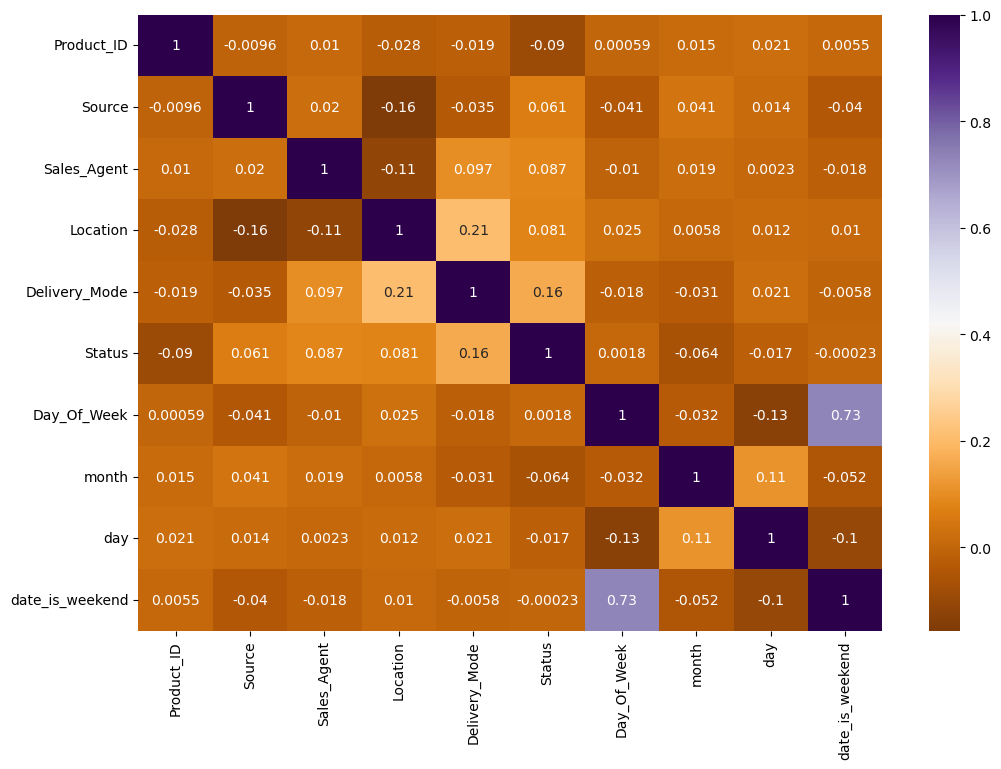

In [90]:
# Checking Correlation
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,cmap='PuOr')
plt.show()

## Model Creation

In [91]:
# Split X and y
X = data.drop(columns = ['Status'])
y = data['Status']

In [93]:
# balancing data
from collections import Counter
from imblearn.over_sampling import SMOTE
sm = SMOTE() #object creation
print("unbalanced data",Counter(y))
X_sm,y_sm = sm.fit_resample(X,y)
print('Balanced data',Counter(y_sm))

unbalanced data Counter({1: 4491, 0: 2929})
Balanced data Counter({0: 4491, 1: 4491})


In [94]:
# Splitting the training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_sm,y_sm,test_size=0.2,random_state=42)

In [95]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7185, 9)
(7185,)
(1797, 9)
(1797,)


## 1. Logistic Regression

In [96]:
# Step:1 importing library
from sklearn.linear_model import LogisticRegression

# Step:2 Object creation
lr = LogisticRegression(penalty = 'l2',random_state=5)

# Step:3 fitting the training data
lr.fit(X_train,y_train)

# Step:4 Prediction on test data
lr_test_predict = lr.predict(X_test)

# Step:5 Prediction on training data
lr_train_predict = lr.predict(X_train)

## Training Accuracy

In [97]:
# Import library
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report,confusion_matrix
lr_train_accuracy = accuracy_score(lr_train_predict,y_train)
print("Training accuracy of Logistic regression model",lr_train_accuracy*100)
print("Logistic regression training Classification report: \n",classification_report(lr_train_predict,y_train))

Training accuracy of Logistic regression model 61.40570633263744
Logistic regression training Classification report: 
               precision    recall  f1-score   support

           0       0.61      0.61      0.61      3565
           1       0.62      0.61      0.62      3620

    accuracy                           0.61      7185
   macro avg       0.61      0.61      0.61      7185
weighted avg       0.61      0.61      0.61      7185



In [98]:
# Testing Accuracy
lr_test_accuracy = accuracy_score(lr_test_predict,y_test)
print("Testing accuracy of Logistic regression model",lr_test_accuracy*100)
print("Logistic regression testing Classification report: \n",classification_report(lr_test_predict,y_test))

Testing accuracy of Logistic regression model 62.99387868670006
Logistic regression testing Classification report: 
               precision    recall  f1-score   support

           0       0.61      0.64      0.62       864
           1       0.65      0.62      0.64       933

    accuracy                           0.63      1797
   macro avg       0.63      0.63      0.63      1797
weighted avg       0.63      0.63      0.63      1797



In [99]:
# Confusion Matrix
print(confusion_matrix(y_test,lr_test_predict))

[[552 353]
 [312 580]]


## 2. KNN Classifier

In [100]:
# Step:1 Taking the optimal value of k
from sklearn.neighbors import KNeighborsClassifier
error_rate = [] # Creating empty list
for i in range(2,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_knn_predict = knn.predict(X_test)
    error_rate.append(np.mean(y_knn_predict != y_test))
print("Error rate:",error_rate)

Error rate: [0.29827490261547024, 0.28213689482470783, 0.29827490261547024, 0.29271007234279356, 0.30105731775180855, 0.30328324986087923, 0.29549248747913187, 0.30161380077907624, 0.29938786867000555]


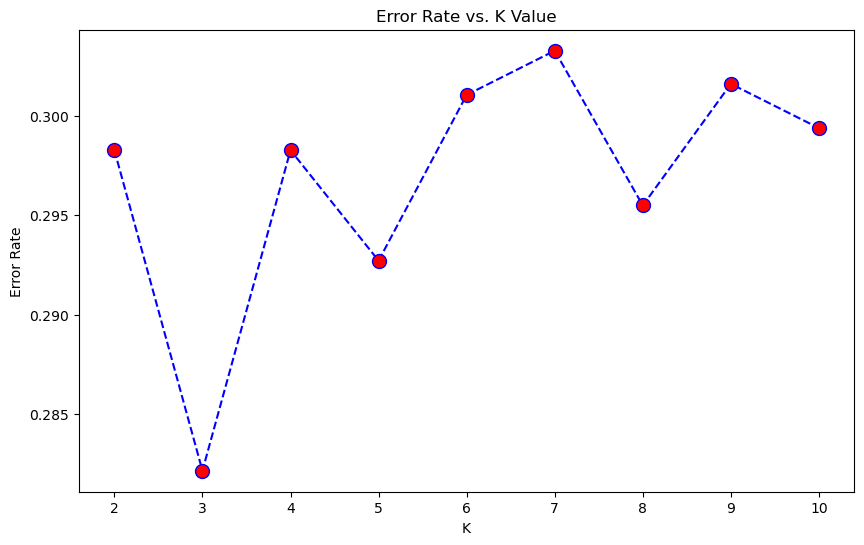

In [101]:
# Step:2 Plotting the error rate
plt.figure(figsize=(10,6))
plt.plot(range(2,11),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [102]:
# Step:3 Get nearst neighbors
knn1 = KNeighborsClassifier(n_neighbors=3)

# Step:4 Fitting the training data
knn1.fit(X_train,y_train)

# Step:5 Prediction on testing data
knn_test_predict = knn1.predict(X_test)

# Step:6 Prediction on training data
knn_train_predict = knn1.predict(X_train)

In [103]:
# Training Accuracy
knn_train_accuracy = accuracy_score(y_train,knn_train_predict)
print("Training accuracy of knn model ",knn_train_accuracy*100)
print("Training classification report:\n",classification_report(knn_train_predict,y_train))

Training accuracy of knn model  84.81558803061935
Training classification report:
               precision    recall  f1-score   support

           0       0.89      0.82      0.85      3899
           1       0.80      0.88      0.84      3286

    accuracy                           0.85      7185
   macro avg       0.85      0.85      0.85      7185
weighted avg       0.85      0.85      0.85      7185



In [104]:
# Testing Accuracy
knn_test_accuracy = accuracy_score(y_test,knn_test_predict)
print("Testing accuracy of knn model",knn_test_accuracy*100)
print("Testing classification report: \n",classification_report(y_test,knn_test_predict))

Testing accuracy of knn model 71.78631051752922
Testing classification report: 
               precision    recall  f1-score   support

           0       0.69      0.79      0.74       905
           1       0.75      0.64      0.69       892

    accuracy                           0.72      1797
   macro avg       0.72      0.72      0.72      1797
weighted avg       0.72      0.72      0.72      1797



In [105]:
# Confusion Matrix
print(confusion_matrix(y_test,knn_test_predict))

[[718 187]
 [320 572]]


### USE BAGGING ON KNEIGHBOURS CLASSIFIER

In [106]:
# step:1 Create a K-neighbour classifier object
knn1 = KNeighborsClassifier(n_neighbors=3)

# Step:2 importing library and creating bagging object
from sklearn.ensemble import BaggingClassifier
bagg = BaggingClassifier(base_estimator=knn1,n_estimators=50)

# Step:3 Fitting the training data
bagg.fit(X_train,y_train)

# Step:4 Prediction on test data
bagg_predict = bagg.predict(X_test)

In [107]:
bagg_accuracy = accuracy_score(y_test,bagg_predict)
print("Score after bagging:",bagg_accuracy*100)

Score after bagging: 72.34279354479688


## 3. Decision Tree

In [108]:
# Step:1 Importing library and object creation
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion = 'entropy',max_depth = None , random_state = 21 , max_features = None, min_samples_leaf =20)

# Step:2 fitting training data
dt.fit(X_train,y_train)

# Step:3 Prediction on test data
dt_test_predict = dt.predict(X_test)

# Step:4 Prediction on training data
dt_train_predict = dt.predict(X_train)

In [109]:
# Training Accuracy
dt_train_accuracy = accuracy_score(y_train,dt_train_predict)
print("Training accuracy of Decision tree classifier:",dt_train_accuracy*100)
print("classification report of training:"'\n',classification_report(y_train,dt_train_predict))

Training accuracy of Decision tree classifier: 75.51844119693807
classification report of training:
               precision    recall  f1-score   support

           0       0.75      0.77      0.76      3586
           1       0.76      0.74      0.75      3599

    accuracy                           0.76      7185
   macro avg       0.76      0.76      0.76      7185
weighted avg       0.76      0.76      0.76      7185



In [110]:
# Testing Accuracy
dt_test_accuracy = accuracy_score(y_test,dt_test_predict)
print("Training accuracy of Decision tree classifier:",dt_test_accuracy*100)
print("classification report of training:"'\n',classification_report(y_test,dt_test_predict))

Training accuracy of Decision tree classifier: 70.4507512520868
classification report of training:
               precision    recall  f1-score   support

           0       0.70      0.71      0.71       905
           1       0.70      0.70      0.70       892

    accuracy                           0.70      1797
   macro avg       0.70      0.70      0.70      1797
weighted avg       0.70      0.70      0.70      1797



In [111]:
# Confusion Matrix
print(confusion_matrix(y_test,dt_test_predict))

[[644 261]
 [270 622]]


### Hyperparameter Tuning

In [112]:
# Step:1 importing library
from sklearn.model_selection import GridSearchCV

# Step:2 Tunning the parameter
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 30))), 
    "min_samples_split":[2, 3, 4,5], 
    "min_samples_leaf":list(range(1, 10)),}


tree_c = DecisionTreeClassifier(random_state=3)
tree_cv = GridSearchCV(tree_c, params, scoring="f1", n_jobs=-1, verbose=2, cv=3)

# Fitting traning data
tree_cv.fit(X_train,y_train)

# Get the best parameter
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params}")

Fitting 3 folds for each of 4176 candidates, totalling 12528 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [113]:
# Step:3 place the parameter on decision tree classifier
dt1=DecisionTreeClassifier(criterion='gini',
                           max_depth=13,min_samples_leaf=1,
                           min_samples_split=2,splitter='best')

In [114]:
# Step:4 fitting training data
dt1.fit(X_train,y_train)

# Step:5 prdiction on testing data
yhat = dt1.predict(X_test)

In [115]:
# Testing Accuracy
dt1_test_accuracy = accuracy_score(y_test,yhat)
print("Accuracy score:",dt1_test_accuracy*100)
print("Classification report:"'\n',classification_report(y_test,yhat))

Accuracy score: 69.39343350027825
Classification report:
               precision    recall  f1-score   support

           0       0.68      0.73      0.71       905
           1       0.71      0.65      0.68       892

    accuracy                           0.69      1797
   macro avg       0.69      0.69      0.69      1797
weighted avg       0.69      0.69      0.69      1797



## 4.Random Forest Classifier

In [118]:
# Step:1 import library and object creation
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

# Step:2 fitting the training data
rf.fit(X_train,y_train)

# Step:3 Prediction on test data
rf_test_predict = rf.predict(X_test)

# Step:4 Prediction on training data
rf_train_predict = rf.predict(X_train)

In [119]:
# Training Accuracy
rf_train_accuracy = accuracy_score(y_train,rf_train_predict)
print("Training accuracy of random forest classifier:",rf_train_accuracy*100)
print("Classification report of training:"'\n',classification_report(y_train,rf_train_predict))

Training accuracy of random forest classifier: 98.52470424495476
Classification report of training:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      3586
           1       0.98      0.99      0.99      3599

    accuracy                           0.99      7185
   macro avg       0.99      0.99      0.99      7185
weighted avg       0.99      0.99      0.99      7185



In [120]:
# Testing Accuracy
rf_test_accuracy = accuracy_score(y_test,rf_test_predict)
print("Testing accuracy of random forest classifier:",rf_test_accuracy*100)
print("Classification report of training:"'\n',classification_report(y_test,rf_test_predict))

Testing accuracy of random forest classifier: 74.62437395659433
Classification report of training:
               precision    recall  f1-score   support

           0       0.73      0.78      0.76       905
           1       0.76      0.71      0.74       892

    accuracy                           0.75      1797
   macro avg       0.75      0.75      0.75      1797
weighted avg       0.75      0.75      0.75      1797



In [121]:
# Confusion Matrix
print(confusion_matrix(y_test,rf_test_predict))

[[705 200]
 [256 636]]


## Hyperparameter tuning

In [122]:
# Step:1 [imutation of parameter]
from sklearn.model_selection import RandomizedSearchCV
# not used grid search cv beacuse memory reason

n_estimators = [int(x) for x in np.linspace(start=100, stop=2000, num=10)]
max_features = ['auto', 'sqrt'] ### auto - select randomly, sqrt - 
max_depth = [int(x) for x in np.linspace(10, 110, num=10)] ### level in the tree
max_depth.append(None)
min_samples_split = [2, 5, 15]
min_samples_leaf = [1, 2, 4]


# Step:2 make a dictionary of parameter
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# Step:3 Object creation
rf_clf1 = RandomForestClassifier(random_state=42) 
# provide random state beacuse select row and column randomly


# Step:4 randomized search cv with parameter
rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=3, random_state=42, n_jobs=-1)


# Step:5 fitting the training data
rf_cv.fit(X_train, y_train)

# Step:6 Getting the best parameter
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")
 


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 2000, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 21})


In [123]:
# Step:7 
rf_clf2 = RandomForestClassifier(**rf_best_params)

# Step:8 Fitting the training data
rf_clf2.fit(X_train,y_train)

# Step:9 Prediction on test data
y_predict = rf_clf2.predict(X_test)

In [124]:
rf_train_predict = rf_clf2.predict(X_train)
train_accuracy = accuracy_score(y_train,rf_train_predict)
train_accuracy

0.9625608907446068

In [125]:
test_accuracy = accuracy_score(y_test,y_predict)
print("Testing accuracy after hyper parameter tunning:",test_accuracy*100)

Testing accuracy after hyper parameter tunning: 75.73734001112966


## 5. Gradient Boosting Classifier

In [126]:
# Step:1 Object cretion
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(learning_rate=0.1,n_estimators=150,random_state=42)

# Step:2 fitting the training data
gb.fit(X_train,y_train) ## fitting the data

# Step:3 prediction on test data
gb_test_predict=gb.predict(X_test)

# Step:4 Prediction on train data
gb_train_predict = gb.predict(X_train)

In [127]:
# Training Accuracy
gb_train_accuracy = accuracy_score(y_train,gb_train_predict)
print("Grediant boosting classifier training accuracy:",gb_train_accuracy*100)
print("Classification report of training:"'\n',classification_report(y_train,gb_train_predict))

Grediant boosting classifier training accuracy: 75.43493389004871
Classification report of training:
               precision    recall  f1-score   support

           0       0.74      0.78      0.76      3586
           1       0.77      0.73      0.75      3599

    accuracy                           0.75      7185
   macro avg       0.76      0.75      0.75      7185
weighted avg       0.76      0.75      0.75      7185



In [128]:
# Testing Accuracy
gb_test_accuracy = accuracy_score(y_test,gb_test_predict)
print("Grediant boosting classifier testing accuracy:",gb_test_accuracy*100)
print("Classification report of testing:"'\n',classification_report(y_test,gb_test_predict))

Grediant boosting classifier testing accuracy: 74.45742904841403
Classification report of testing:
               precision    recall  f1-score   support

           0       0.74      0.76      0.75       905
           1       0.75      0.73      0.74       892

    accuracy                           0.74      1797
   macro avg       0.74      0.74      0.74      1797
weighted avg       0.74      0.74      0.74      1797



In [129]:
# Confusion Matrix
print(confusion_matrix(y_test,gb_test_predict))

[[690 215]
 [244 648]]


## 6. XGB Classifier

In [130]:
# Step:1 import library and object creation
import xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier()

# Step:2 Fitting the training data
xgb.fit(X_train,y_train)

# Step:3 Prediction on training data
xgb_train_predict = xgb.predict(X_train)

# Step:4 Prediction on testing data
xgb_test_predict = xgb.predict(X_test)

In [131]:
# Training Accuracy
xgb_train_accuracy = accuracy_score(xgb_train_predict,y_train)
print("Training accuracy of xgb model",xgb_train_accuracy*100)
print("Classifiaction report on training: \n",classification_report(xgb_train_predict,y_train))

Training accuracy of xgb model 89.33890048712595
Classifiaction report on training: 
               precision    recall  f1-score   support

           0       0.90      0.89      0.89      3654
           1       0.88      0.90      0.89      3531

    accuracy                           0.89      7185
   macro avg       0.89      0.89      0.89      7185
weighted avg       0.89      0.89      0.89      7185



In [133]:
# Testing Accuracy
xgb_test_accuracy = accuracy_score(xgb_test_predict,y_test)
print("Testing accuracy of xgb model",xgb_test_accuracy*100)
print("Classification report on testing: \n",classification_report(xgb_test_predict,y_test))

Testing accuracy of xgb model 74.56872565386756
Classification report on testing: 
               precision    recall  f1-score   support

           0       0.76      0.74      0.75       936
           1       0.73      0.75      0.74       861

    accuracy                           0.75      1797
   macro avg       0.75      0.75      0.75      1797
weighted avg       0.75      0.75      0.75      1797



In [134]:
# Confusion Matrix
print(confusion_matrix(y_test,xgb_test_predict))

[[692 213]
 [244 648]]


## Hyperparameter Tuning

In [135]:
# Step:1 import library 
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.001,0.01,0.1, 0.03, 0.06, 0.1, 0.15, 0.02,0.003, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [3,5,6,7,8,10],
              'n_estimators': [50,65,80,100,130,150],
              'reg_alpha': [0,0.01,0.1,0.02,0.2,0.4,0.8,1.6,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.01,0.1,0.02,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

# Step:2 Object creation with parameter
XGB = XGBClassifier(random_state=42)

# Step:3 Create randomized search cv with parameter
rcv = RandomizedSearchCV(estimator=XGB,scoring='f1',param_distributions=param_grid,n_iter=150,
                        cv=5,verbose=3,random_state=5,n_jobs=-1)

#estimator - number of decision tree
#scoring - performance matrix to check performance
#param_distribution - hyperparametes(dictionary we created)
#n_iter - Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv - number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs - Number of jobs to run in parallel,-1 means using all processors.

# Step:4 Fitting training data on randomized search cv
rcv.fit(X_train,y_train)

# Step:5 Get best parameters
rcv_best_parameter = rcv.best_params_
print(f"Best parameter: {rcv_best_parameter}")


Fitting 5 folds for each of 150 candidates, totalling 750 fits
Best parameter: {'reg_lambda': 25.6, 'reg_alpha': 0.8, 'n_estimators': 150, 'max_depth': 10, 'learning_rate': 0.4, 'gamma': 0.2}


In [136]:
# Step:6 Place the best parameter
XGB2 = XGBClassifier(reg_lambda=25.6,reg_alpha=0.8,n_estimators=150,max_depth=10,learning_rate=0.4,gamma=0.2)

# Step:7 Fitting the training data
XGB2.fit(X_train,y_train)

# Step:8 Prediction on testing data
XGB_prediction = XGB2.predict(X_test)

In [137]:
XGB_accuracy = accuracy_score(XGB_prediction,y_test)
print("Accuracy score after hyperparameter tunning",XGB_accuracy*100)
print("Classification report: \n",classification_report(XGB_prediction,y_test))

Accuracy score after hyperparameter tunning 75.57039510294936
Classification report: 
               precision    recall  f1-score   support

           0       0.78      0.75      0.76       942
           1       0.73      0.76      0.75       855

    accuracy                           0.76      1797
   macro avg       0.76      0.76      0.76      1797
weighted avg       0.76      0.76      0.76      1797



## Support Vector Machine

In [138]:
# Step:1 import library and object creation
from sklearn.svm import SVC
svclassifier = SVC(random_state = 1) ## base model with default parameters

# Step:2 Fitting the training data
svclassifier.fit(X_train, y_train)

# Step:3 Prediction on training data
svc_train_predict = svclassifier.predict(X_train)

# Step:4 Prediction on testing data
svc_test_predict=svclassifier.predict(X_test)

In [139]:
# Training Accuracy
svc_train_accuracy = accuracy_score(svc_train_predict,y_train)
print("Training accuracy of SVC model",svc_train_accuracy*100)
print("Classifiaction report on training: \n",classification_report(svc_train_predict,y_train))

Training accuracy of SVC model 65.58107167710509
Classifiaction report on training: 
               precision    recall  f1-score   support

           0       0.74      0.63      0.68      4199
           1       0.57      0.69      0.62      2986

    accuracy                           0.66      7185
   macro avg       0.66      0.66      0.65      7185
weighted avg       0.67      0.66      0.66      7185



In [140]:
# Testing Accuracy
svc_test_accuracy = accuracy_score(svc_test_predict,y_test)
print("Testing accuracy of SVC model",svc_test_accuracy*100)
print("Classification report on testing: \n",classification_report(svc_test_predict,y_test))

Testing accuracy of SVC model 66.33277685030606
Classification report on testing: 
               precision    recall  f1-score   support

           0       0.73      0.65      0.69      1024
           1       0.59      0.69      0.64       773

    accuracy                           0.66      1797
   macro avg       0.66      0.67      0.66      1797
weighted avg       0.67      0.66      0.66      1797



In [141]:
# Confusion Matrix
print(confusion_matrix(y_test,svc_test_predict))

[[662 243]
 [362 530]]


## Comparison of Accuracy of above models

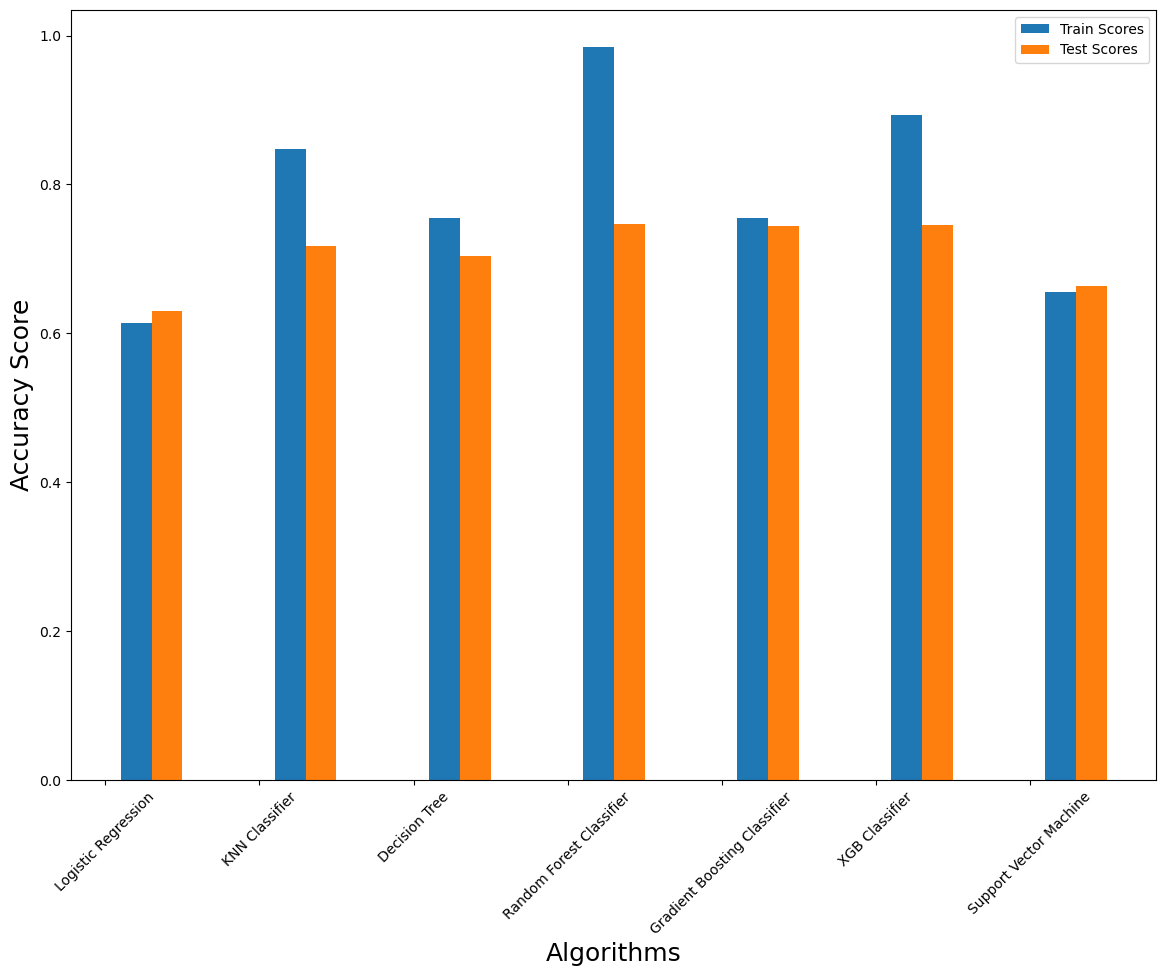

In [142]:
# set width of the bar
barwidth = 0.25
fig = plt.subplots(figsize=(14,10))

## Define data
algorithms = ["Logistic Regression","KNN Classifier","Decision Tree","Random Forest Classifier","Gradient Boosting Classifier","XGB Classifier","Support Vector Machine"]
train_scores = [lr_train_accuracy,knn_train_accuracy,dt_train_accuracy,rf_train_accuracy,gb_train_accuracy,xgb_train_accuracy,svc_train_accuracy]
test_scores = [lr_test_accuracy,knn_test_accuracy,dt_test_accuracy,rf_test_accuracy,gb_test_accuracy,xgb_test_accuracy,svc_test_accuracy]

x_axis = np.arange(len(algorithms))

# Multi bar chart
plt.bar(x_axis + 0.2, train_scores, width = 0.2, label = 'Train Scores')
plt.bar(x_axis + 0.2*2, test_scores,width = 0.2, label = 'Test Scores')

# Xticks
plt.xlabel('Algorithms', fontsize = 18)
plt.ylabel('Accuracy Score', fontsize = 18)
plt.xticks(x_axis,algorithms,rotation=45)

# Add legend
plt.legend()

# Display
plt.show()

# Conclusion

### Task 1: Data Exploration insights - Sales effectiveness
- Exploratory Data Analysis and insights are given for the above dataset.

### Task 2: ML model to predict the Lead Category (High Potential, Low Potential)

- After data preprocessing the data was trained and tested by different ML models.

- I have used two different techniques that are Normal approach and performed Hyperparameter tuning when model was overfitting or underfitting.

- Logistic Regression did not performed well on training as well as testing data.

- KNN model performed well on training data but not performed well on testing data so tried with bagging but a slight improvement in accuracy.

- Decision tree training accuarcy is 76% and testing accuracy is 70%.

- Random Forest training accuracy is 99% and testing accuracy is 75% hence the model is underfitting so did hyperparameter tuning after that score has improved to 76%.
  
- Gradient Boosting Classifier model gives the highest accuracy score as 74% compare with other methods as this model has low bias and low variance called as generalized model.

- XGB Classifier also gave training accuracy as 90% and testing accuracy as 74% which is ovefitted model.

- Support vector machine also performed poor on training as well as test side.
   
- After Hyperparameter tuning of models, Random Forest has given the highest accuracy score as 76%.